In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [ ]:
!pip install google-colab
from google.colab import drive
drive.mount("/content/drive/")



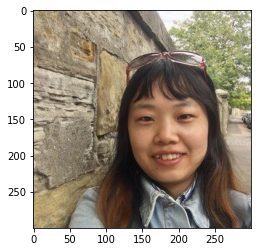

In [41]:
img = image.load_img("/content/drive/MyDrive/basedata/training/happy/3.jpg")
plt.imshow(img)

In [42]:
cv2.imread("/content/drive/MyDrive/basedata/training/happy/3.jpg").shape

(300, 300, 3)

In [43]:
training=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [44]:
training_dataset= train.flow_from_directory('/content/drive/MyDrive/basedata/training',
                                            target_size = (200,200),
                                            batch_size =3,
                                            class_mode ='binary')
validation_dataset= train.flow_from_directory('/content/drive/MyDrive/basedata/validation',
                                            target_size = (200,200),
                                            batch_size =3,
                                            class_mode ='binary')
training_dataset.class_indices

Found 30 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


{'happy': 0, 'unhapp': 1}

In [45]:
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [52]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])


In [53]:
model.fit = model.fit(training_dataset,
                      steps_per_epoch=5,
                      epochs=10,
                      validation_data = validation_dataset)

Epoch 1/10
5/5 [==============================] - 4s 639ms/step - loss: 3.9835 - accuracy: 0.4935 - val_loss: 0.8403 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 3s 584ms/step - loss: 0.6477 - accuracy: 0.6704 - val_loss: 1.2264 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 3s 581ms/step - loss: 1.1051 - accuracy: 0.4139 - val_loss: 0.4782 - val_accuracy: 0.5714
Epoch 4/10
5/5 [==============================] - 3s 603ms/step - loss: 0.1785 - accuracy: 0.8620 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 3s 583ms/step - loss: 0.2365 - accuracy: 0.9176 - val_loss: 8.1253e-04 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 3s 586ms/step - loss: 5.7850e-04 - accuracy: 1.0000 - val_loss: 6.2084e-04 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 3s 584ms/step - loss: 2.5562e-04 - accuracy: 1.0000 - val_loss: 5.0147e-04 - val_accuracy: 1.0000


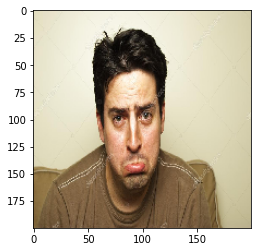

You are unhappy


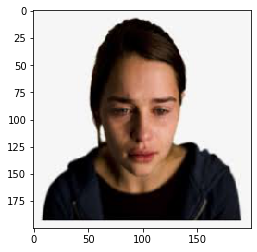

You are unhappy


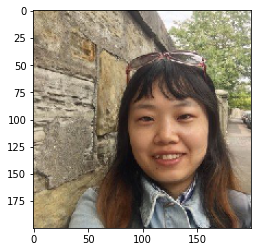

You are happy


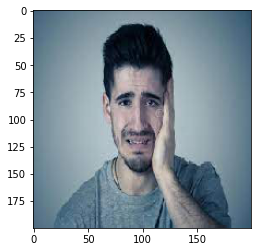

You are unhappy


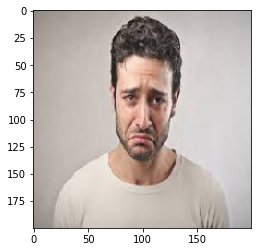

You are unhappy


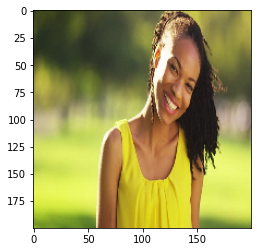

You are happy


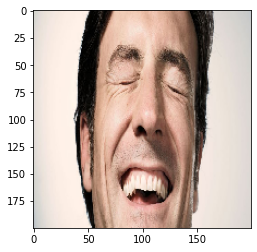

You are happy


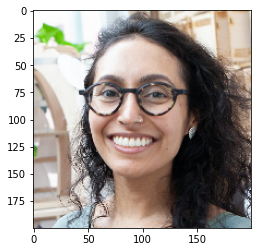

You are happy


In [58]:
dir_path="/content/drive/MyDrive/basedata/testing"
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=model.predict(images)
  if val==0:
    print("You are happy")
  else:
    print("You are unhappy")